# Fitting the "ionic model" of isotope fractionation 

The starting point is to imagine that the isotope vibrates in a potential well
that somehow represents the effective bonding between the atom of interest and
the rest of the crystal. We can follow Young et al. (2015) and represent the
interaction via a Born–Mayer type interionic potential:

$$ E(r_{ij}) = \frac{z_iz_j}{r_{ij}}\left(\frac{e^2}{4\pi\epsilon_0}\right) + \frac{b}{r_{ij}^n} + E_0$$

which gives the energy of the bond, $E$, as a function of the distance between the ions, $r_{ij}$.
The first term represents the Coulomb interaction between ions (which is attractive 
for ions of opposite charge since reducing r_{ij} makes the energy more negative). The
the second term represents repulsion between ions due to overlap of their electron clouds. At small
$r_{ij}$ this repulsion dominates and there is an $r_{ij}$, the equilbrium bond lenght $r_0$, 
which minimises $E$. The parameters $z_i$ and $z_j$ represent the charges on the ions, $e$ is the 
charge of an electron, $\epsilon_0$ is the vaccum permittivity, and $b$ and $n$ are parameters that
define the strength of the repulsion term. $E_0$ just sets the absolute energy (and is not further
involved otherwise). The force acting between ions is the neg

Force...

$$ F(r) = \frac{\mathrm{d}E}{\mathrm{d}r} 
        =  -\frac{z_iz_j}{r^2_{ij}}\left(\frac{e^2}{4\pi\epsilon_0}\right)
           - \frac{bn}{r_{ij}^{n+1}}$$
                                             
Force constant 

$$ K(r) = \frac{\mathrm{d}^2E}{\mathrm{d}r^2}
        = \frac{2z_iz_j}{r^3_{ij}}\left(\frac{e^2}{4\pi\epsilon_0}\right)
           - \frac{b(n-1)n}{r_{ij}^{n+2}}$$
           
at minimum, $r_0$, $\frac{\mathrm{d}E}{\mathrm{d}r} = 0$ thus:

$$ b = -\left(\frac{e^2}{4\pi\epsilon_0}\right)\frac{z_iz_j}{nr_0^{n-1}} $$

and

$$K(r=r_0) = \frac{2z_iz_j}{r^3_{ij}}\left(\frac{e^2}{4\pi\epsilon_0}\right)
           - \left(\frac{z_iz_je^2}{4\pi\epsilon_0}\right)\frac{(n-1)n}{nr_0^{n-1} r_0^{n+2}}$$
           
... need to check this lot. See notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def energy(r, zi, zj, b, n):
    eps0 = 8.854187817E-12 # Vaccum permittivity (F/m)
    e = 1.60217662E-19 # electron charge (C)
    en = (zi*zj*e**2)/(4.0*np.pi*eps0*r) + (b/r**n)
    return en
    

In [3]:
def cal_b(r0, zi, zj, n):
    eps0 = 8.854187817E-12 # Vaccum permittivity (F/m)
    e = 1.60217662E-19 # electron charge (C)
    b = -((zi*zj*e**2)/(4.0*np.pi*eps0*r0**2)) * r0**(n+1)/n
    return b

In [4]:
def de_by_dr(r, zi, zj, b, n):
    eps0 = 8.854187817E-12 # Vaccum permittivity (F/m)
    e = 1.60217662E-19 # electron charge (C)
    force = -((zi*zj*e**2)/(4.0*np.pi*eps0*r**2)) - ((b*n)/r**(n+1))
    return force

In [38]:
def d2e_by_dr2(r, zi, zj, b, n):
    eps0 = 8.854187817E-12 # Vaccum permittivity (F/m)
    e = 1.60217662E-19 # electron charge (C)
    k = ((2.0*zi*zj*e**2)/(4.0*np.pi*eps0*r**3)) - ((b*(-n-1)*n)/r**(n+2))
    return k

In [39]:
def kf(r0, zi, zj, n):
    eps0 = 8.854187817E-12 # Vaccum permittivity (F/m)
    e = 1.60217662E-19 # electron charge (C)
    k = (zi * zj * e**2 * (1-n)) / (4.0 * np.pi * eps0 * r0**3)
    return k

In [40]:
rs = np.linspace(1.5E-10, 4.0E-10)
n = 12
zi = 2.0
zj = -2.0
r0 = 2.1170E-10
b = cal_b(r0, zi, zj, n)
ens = energy(rs, zi, zj, b, n)
force = de_by_dr(rs, zi, zj, b, n)
k = d2e_by_dr2(rs, zi, zj, b, n)
print(de_by_dr(r0, zi, zj, b, n))
print(d2e_by_dr2(r0, zi, zj, b, n))
print(kf(r0, zi, zj, n))

0.0
1069.9224200741644
1069.9224200741646


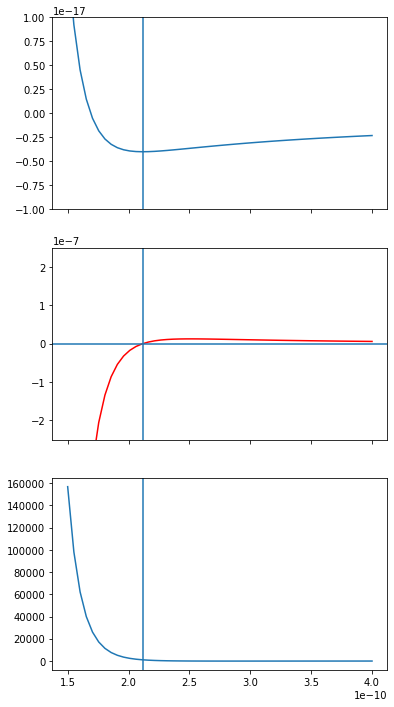

In [41]:
fig, ax = plt.subplots(nrows=3, figsize=(6,12), sharex=True)

ax[0].plot(rs, ens)
ax[0].set_ylim(-1E-17, 1E-17)
ax[0].axvline(r0)

ax[1].plot(rs, force, 'r')
ax[1].set_ylim(-0.00000025, 0.00000025)
ax[1].axvline(r0)
ax[1].axhline(0.0)

ax[2].plot(rs, k)
ax[2].axvline(r0)
plt.show()